In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from statsmodels.api import Logit

In [6]:
df_raw = pd.read_csv("2BD/유방암.csv", encoding="euc-kr")

In [30]:
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [7]:
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [8]:
df_raw_y = df_raw["diagnosis"]
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y, test_size = 0.428, random_state = 1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))
print("validation data X size : {}".format(df_validation_x.shape))
print("validation data Y size : {}".format(df_validation_y.shape))

train data X size : (128, 30)
train data Y size : (128,)
test data X size : (96, 30)
test data Y size : (96,)
validation data X size : (96, 30)
validation data Y size : (96,)


In [9]:
rf = RandomForestClassifier(random_state = 1234)
rf.fit(df_train_x,df_train_y)
print("Score on training set: {:.3f}".format(rf.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.938


In [10]:
rf

RandomForestClassifier(random_state=1234)

In [11]:
train_accuracy = []
test_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state = 1234, n_estimators = v_n_estimators)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_validation_x,df_validation_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,1.0,0.938
1,20,1.0,0.917
2,30,1.0,0.917
3,40,1.0,0.917
4,50,1.0,0.917
5,60,1.0,0.917
6,70,1.0,0.917
7,80,1.0,0.917
8,90,1.0,0.917
9,100,1.0,0.917


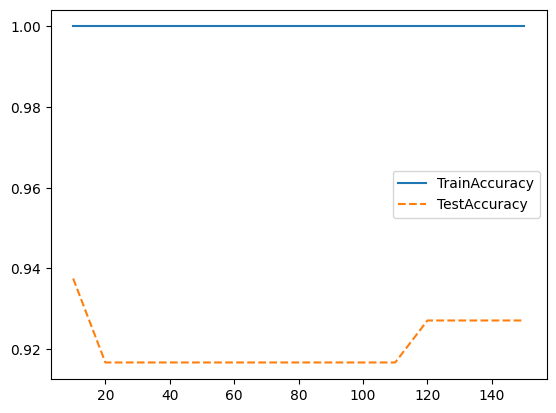

In [12]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label="TrainAccuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label="TestAccuracy")
plt.legend()

In [13]:
train_accuracy = []
test_accuracy = []
para_n_tree = [n_tree for n_tree in range(20,41)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state = 1234, n_estimators = v_n_estimators)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_validation_x,df_validation_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,20,1.0,0.917
1,21,1.0,0.917
2,22,1.0,0.927
3,23,1.0,0.917
4,24,1.0,0.927
5,25,1.0,0.927
6,26,1.0,0.927
7,27,1.0,0.917
8,28,1.0,0.927
9,29,1.0,0.917


In [14]:
oob_error = []
for v_n_estimators in range(1, 40):
    rf = RandomForestClassifier(n_estimators = v_n_estimators, oob_score = True, random_state = 1234)
    rf.fit(df_train_x,df_train_y)
    oob_error.append(1 - rf.oob_score_)

/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably me

Text(0.5, 0, 'n_estimators')

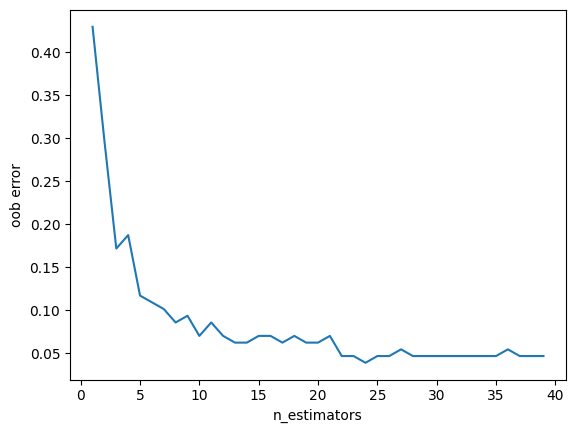

In [15]:
plt.plot(range(1,40),oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

In [16]:
train_accuracy = []
test_accuracy = []
para_depth = [depth for depth in range(1, 20)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(random_state = 1234,n_estimators = 37,max_depth = v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_validation_x,df_validation_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.961,0.896
1,2,0.977,0.917
2,3,1.000,0.927
3,4,1.000,0.927
4,5,1.000,0.917
5,6,1.000,0.917
6,7,1.000,0.917
7,8,1.000,0.917
8,9,1.000,0.917
9,10,1.000,0.917


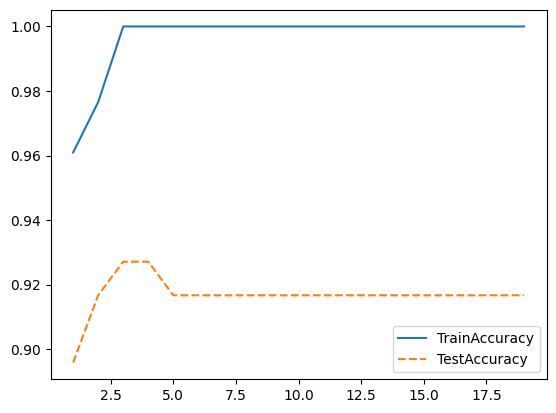

In [17]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label="TrainAccuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label="TestAccuracy")
plt.legend()

In [18]:
train_accuracy = []
test_accuracy = []
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state=1234,n_estimators=37, max_depth=3, min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_validation_x,df_validation_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.992,0.917
1,20,0.984,0.917
2,30,0.984,0.927
3,40,0.953,0.896
4,50,0.961,0.896
5,60,0.961,0.896
6,70,0.961,0.896
7,80,0.938,0.885
8,90,0.656,0.583
9,100,0.656,0.583


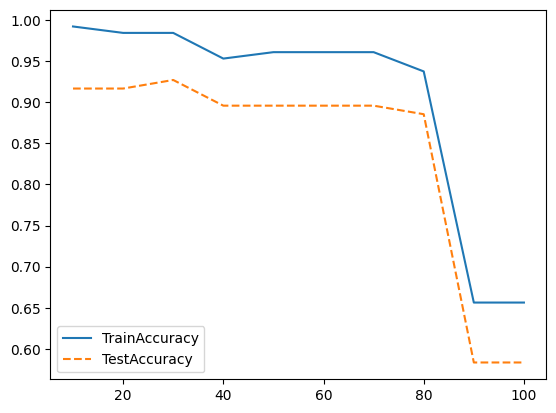

In [19]:
plt.plot(para_split, train_accuracy, linestyle = "-", label="TrainAccuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label="TestAccuracy")
plt.legend()

In [20]:
train_accuracy = []
test_accuracy = []
para_split = [n_split for n_split in range(30,51)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state=1234,n_estimators=37, max_depth=3, min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_validation_x,df_validation_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,30,0.984,0.927
1,31,0.984,0.927
2,32,0.984,0.917
3,33,0.977,0.906
4,34,0.969,0.906
5,35,0.969,0.906
6,36,0.953,0.906
7,37,0.953,0.906
8,38,0.953,0.896
9,39,0.953,0.896


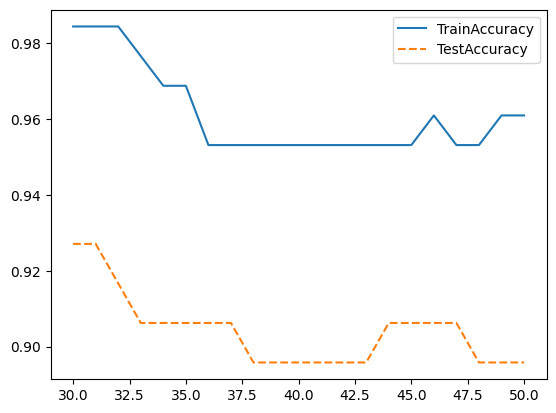

In [21]:
plt.plot(para_split, train_accuracy, linestyle = "-", label="TrainAccuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label="TestAccuracy")
plt.legend()

In [22]:
train_accuracy = []
test_accuracy = []
para_leaf = [n_leaf for n_leaf in range(1,31)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(random_state=1234, max_depth=3, n_estimators=37,min_samples_split=40,min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_validation_x,df_validation_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,1,0.953,0.896
1,2,0.953,0.896
2,3,0.953,0.896
3,4,0.953,0.885
4,5,0.953,0.906
5,6,0.961,0.906
6,7,0.953,0.896
7,8,0.953,0.906
8,9,0.961,0.906
9,10,0.961,0.906


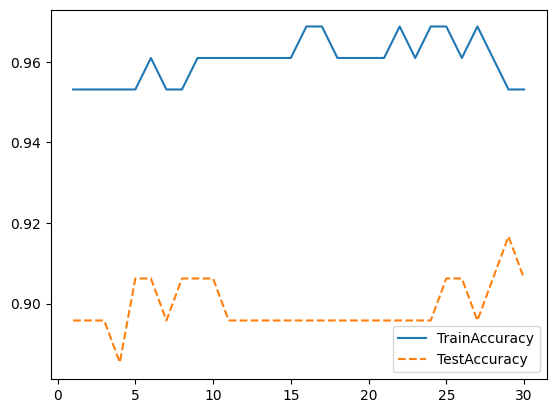

In [23]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label="TrainAccuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label="TestAccuracy")
plt.legend()

In [24]:
rf_final = RandomForestClassifier(random_state = 1234,n_estimators=37,min_samples_leaf = 26, min_samples_split = 40, max_depth = 3) 
rf_final.fit(df_train_x, df_train_y)

RandomForestClassifier(max_depth=3, min_samples_leaf=26, min_samples_split=40,
                       n_estimators=37, random_state=1234)

In [25]:
y_pred = rf_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(rf_final.score(df_test_x,df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy: 0.917

Confusion matrix: 
[[20  4]
 [ 4 68]]


91.7%의 정확도로 환자가 유방암인지 아닌지 예측할 수 있습니다.
  
confusion matrix:
  
[[20 1]
[11 55]]
  
악성일때 악성이라고 판단한 갯수가 20이고 악성인데 양성이라고 판단한 갯수가 4입니다.
  
실제 양성인데 악성이라 판단한 갯수가 4, 양성일때 양성이라고 판단한 갯수가 68입니다.

In [31]:
df_importance = pd.DataFrame()
# df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Importance
20,0.136
22,0.134
2,0.110
27,0.108
6,0.106
23,0.081
17,0.081
7,0.055
10,0.027
12,0.027


Text(0, 0.5, 'Variable')

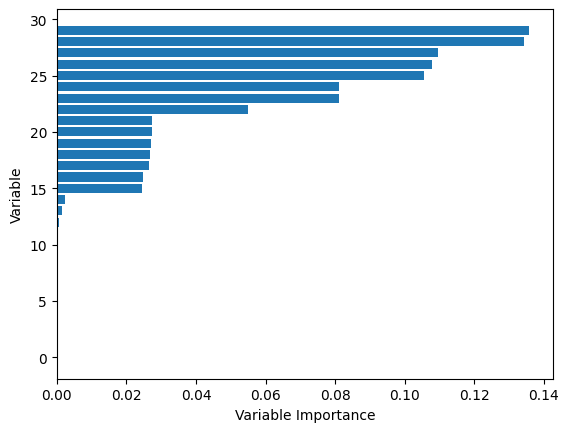

In [33]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
# plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")